In [23]:
# import dependencies
import numpy as np
import pandas as pd

import openpyxl

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [24]:
# Load the data
housing_data = pd.read_excel('1553768847_housing.xlsx',engine = 'openpyxl')

# printing out first 5 rows of data
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [25]:
# obtaining column names for housing data
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [26]:
# extracting input (x) and output (y) data
x = housing_data.copy()[['housing_median_age','total_rooms','total_bedrooms', 'population',
                  'households', 'median_income','ocean_proximity']]
y = housing_data.copy().median_house_value

In [27]:
# after inspection, only the total bedroom variable has missing values
x[x.total_bedrooms.isna()].head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
290,47,1256,NaN,570,218,4.3750,NEAR BAY
341,38,992,NaN,732,259,1.6196,NEAR BAY
538,29,5154,NaN,3741,1273,2.5762,NEAR BAY
563,45,891,NaN,384,146,4.9489,NEAR BAY
696,41,746,NaN,387,161,3.9063,NEAR BAY


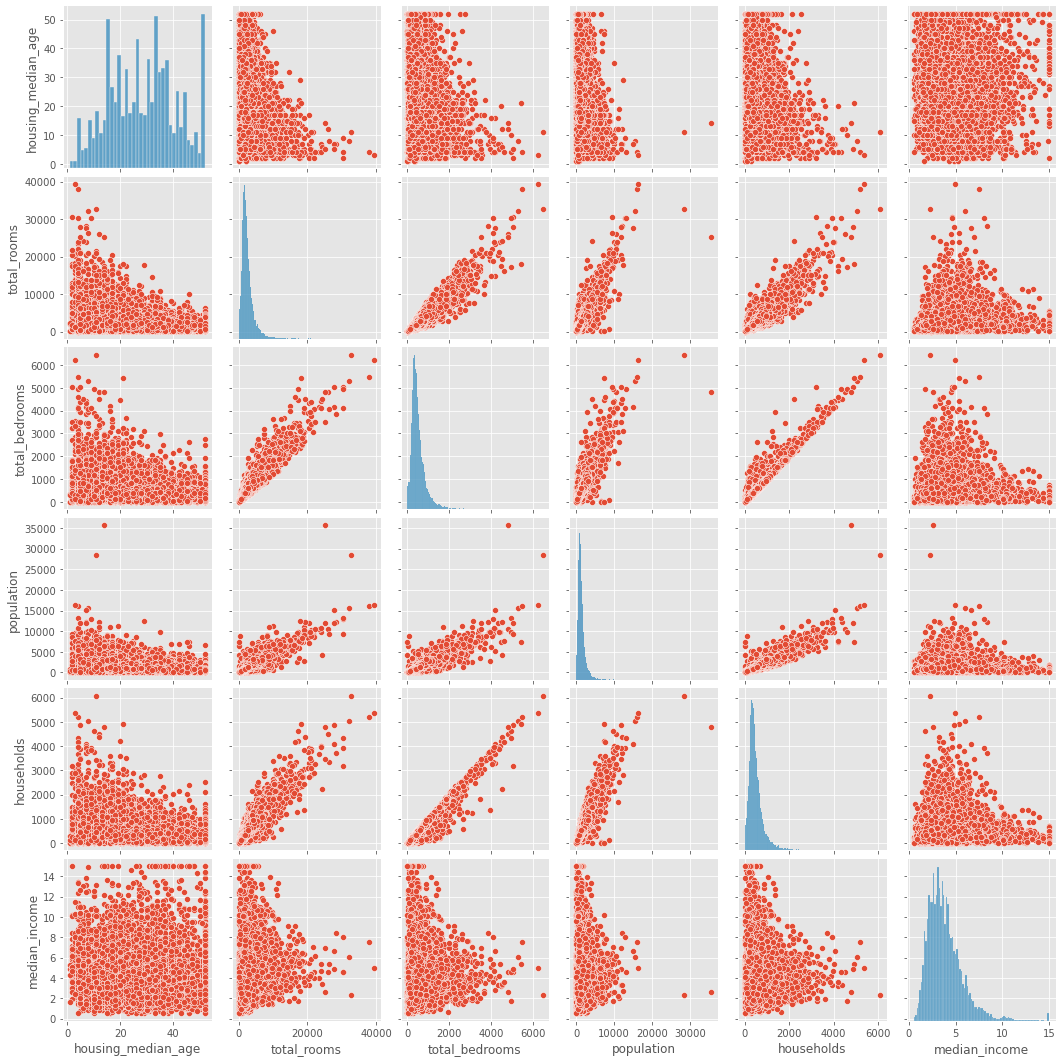

In [28]:
sns.pairplot(x)

In [29]:
# filling missing values with mean
x.total_bedrooms = x.total_bedrooms.fillna(np.round(np.mean(x.total_bedrooms)))

In [30]:
# encoding categorical data (changing categprical to numeric)
x.ocean_proximity = pd.get_dummies(x.ocean_proximity)

# split dataset in training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# creating min_max_scaler object
min_max_scaler = preprocessing.StandardScaler()

# standardize X training data
X_train = min_max_scaler.fit_transform(X_train)

# standardize X test data
X_test = min_max_scaler.transform(X_test)

In [31]:
# creating linear regression model
linearReg = LinearRegression()

# fitting data into linear regression model
linearReg.fit(X_train,y_train)

LinearRegression()

In [32]:
# predicting output using test set
y_predict = linearReg.predict(X_test)

# root mean squared error (RMSE) for linear regression
rmse = mean_squared_error(y_predict,y_test)**0.5
print("the root mean square error is %f" %rmse)

the root mean square error is 76295.348086


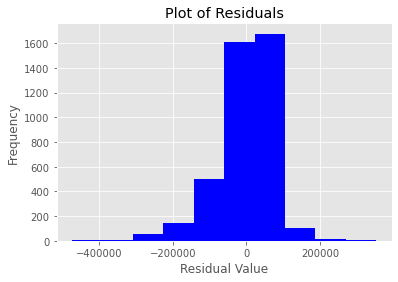

In [33]:
# plotting residuals
res = y_predict - y_test
style.use('ggplot')
plt.hist(res, color = 'b')
plt.title("Plot of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

In [34]:
# linear regression with one independent variable (Bonus Exercise)

# extracting median income values for X_train
median_income_train = X_train[:,5]

# extracting median income values for X_test
median_income_test = X_test[:,5]

# performing linear regression based one median income
linearRegNew = LinearRegression()

# fitting training data into linear regression model
linearRegNew.fit(np.array(median_income_train).reshape(-1,1),y_train)

# predicting output with test data
median_income_predict = linearRegNew.predict(np.array(median_income_test).reshape(-1,1))

Text(0, 0.5, 'Median House Value ($)')

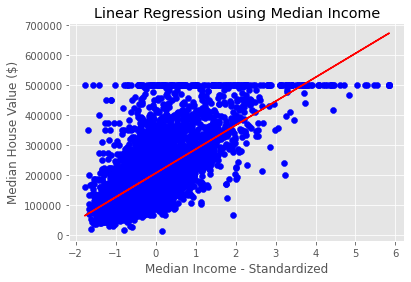

In [35]:
# plotting fitted model
plt.scatter(median_income_test,y_test, color = 'b')
plt.plot(median_income_test,median_income_predict,'r')
plt.title("Linear Regression using Median Income")
plt.xlabel("Median Income - Standardized")
plt.ylabel("Median House Value ($)")

In [36]:
median_income_rmse = mean_squared_error(median_income_predict,y_test)**0.5
print("the root mean square error is %f" %median_income_rmse)

the root mean square error is 84209.012414


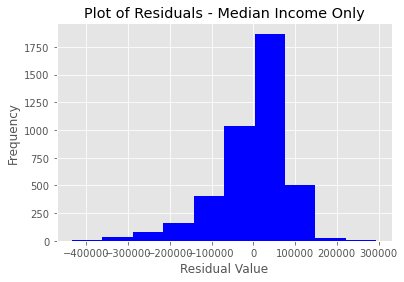

In [37]:
median_income_res = median_income_predict - y_test
plt.hist(median_income_res, color = 'b')
plt.title("Plot of Residuals - Median Income Only")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

### The end!!